In [1]:
%matplotlib widget
from gsm_ve import GSM_VE
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Create instances of each class
pi_gsm_ve = GSM_VE()

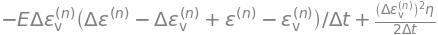

In [3]:
pi_gsm_ve.Pi_n1

In [4]:
pi_gsm_ve.data_dir

WindowsPath('C:/Users/A_structure/bmcs_training_data/default_problem')

In [5]:

E_val = 30e+3  # Young's modulus in MPa
eta_val = 30e+6  # Viscosity modulus in Pa / s
mparams = (E_val, eta_val)
d_t_val = 0.01 # Time step in seconds
final_time = 20  # Final time in secondsfinal_time = 1

# Generate cyclic sinusoidal loading history
time_t = np.linspace(0, final_time, int(final_time / d_t_val) + 1)
eps_t_2_cycles = 0.01 * np.sin(2 * np.pi * 1 * time_t / final_time)  # 2 cycles

d_eps_t = np.diff(eps_t_2_cycles, axis=0)
d_t_t = np.diff(time_t, axis=0)

# Compute responses for both loading histories using get_delta_Pi and get_ddelta_Pi_ddot_eps_v
# data_ipre_2 = perform_integration(ti_minp, pi_ipre, eps_t_2_cycles, time_t, *mparams)
# data_ipre_4 = perform_integration(ti_minp, pi_ipre, eps_t_4_cycles, time_t, *mparams)

# Compute responses for both loading histories using get_Pi and get_jac_Pi_ddot_eps_v
gsm_ve_data = pi_gsm_ve.perform_integration(eps_t_2_cycles, time_t, *mparams)


In [7]:
loaded_data = np.load(Path.home() / "bmcs_training_data" / '2C_1.0A' /"Pi_data_2C_1.0A.npy")

# Print shape and first few rows
print("Loaded data shape:", loaded_data.shape)
print("First few rows:\n", loaded_data)

Loaded data shape: (2000, 5)
First few rows:
 [[ 0.00000000e+00  3.14158749e-05  0.00000000e+00  1.00000000e-02
  -1.47748083e-06]
 [ 3.14158749e-05  3.14155648e-05  3.13531685e-08  1.00000000e-02
  -5.90396836e-06]
 [ 6.28314397e-05  3.14149447e-05  9.40279055e-08  1.00000000e-02
  -1.32704584e-05]
 ...
 [-9.42463843e-05  3.14149447e-05 -2.50101318e-03  1.00000000e-02
  -8.89929668e-03]
 [-6.28314397e-05  3.14155648e-05 -2.49857986e-03  1.00000000e-02
  -9.11212296e-03]
 [-3.14158749e-05  3.14158749e-05 -2.49611762e-03  1.00000000e-02
  -9.32725027e-03]]


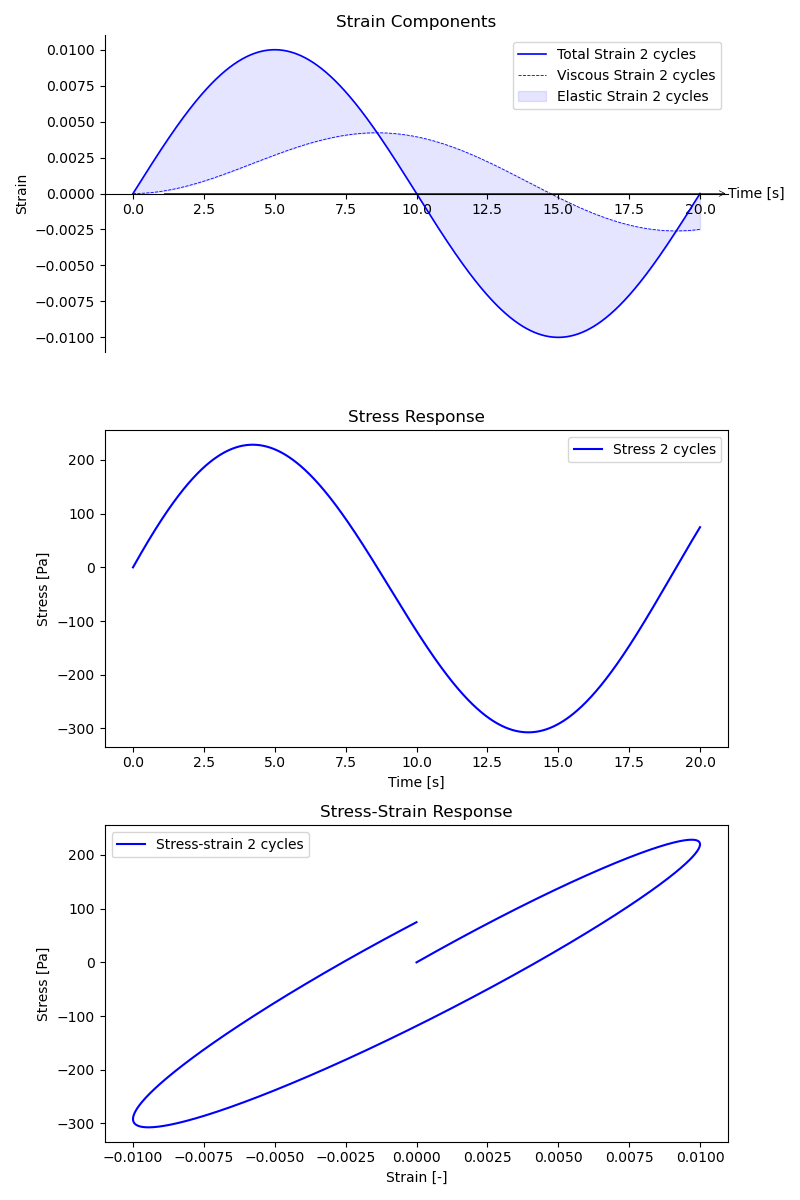

In [8]:
# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
fig.canvas.header_visible = False
# Plot the results for the two studies
pi_gsm_ve.plot_results(ax1, ax2, ax3, gsm_ve_data, '2 cycles', 'blue' )
fig.tight_layout()